## 3.3 多次元配列の計算 
### 3.3.1 多次元配列

In [29]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

A = np.array([1, 2, 3, 4])
print(A)


[1 2 3 4]


In [2]:
np.ndim(A)

1

In [3]:
A.shape

(4,)

A.shape[0]

In [6]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [7]:
np.ndim(B)

2

In [11]:
B.shape

(3, 2)

### 3.3.2 行列の内積

In [12]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [13]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [14]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [15]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [16]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [17]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [18]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [19]:
B = np.array([7,8])
B.shape

(2,)

In [20]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 ニューラルネットワークの内積

In [22]:
X = np.array([1, 2])
X.shape

(2,)

In [23]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [24]:
W.shape

(2, 3)

In [25]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3層ニューラルネットワークの実装
### 3.4.2 各層における信号伝達の実装

In [27]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [30]:
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [31]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [32]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [33]:
def identity_function(x):
        return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### 3.4.3 実装まとめ


In [34]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 3.5 出力層の設計
### 3.5.1 恒等関数とソフトマックス関数

In [35]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [36]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542102


In [37]:
y = exp_a / sum_exp_a
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [39]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.2 ソフトマックス関数の実装上の注意

In [40]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/Users/fyoshino/.anyenv/envs/pyenv/versions/anaconda3-4.2.0/envs/jupyter-notebook-pandas/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/fyoshino/.anyenv/envs/pyenv/versions/anaconda3-4.2.0/envs/jupyter-notebook-pandas/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [41]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [42]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.3 ソフトマックス関数の特徴

In [44]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [45]:
np.sum(y)

1.0

## 手書き文字認識
### 3.6.1 MNIST データセット

In [4]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),  (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(x_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000, 784)


5
(784,)
(28, 28)


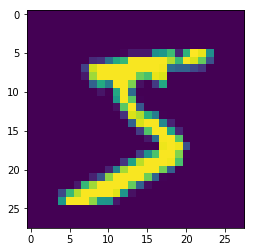

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from matplotlib.pyplot import imshow
from PIL import Image

def img_show(img):
    %matplotlib inline
    pil_img = Image.fromarray(np.uint8(img))
    imshow(np.asarray(pil_img))
        
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)